In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv('House Price Prediction/train.csv',index_col='Id')
test_df = pd.read_csv('House Price Prediction/test.csv',index_col='Id')
print(train_df.shape)
print(test_df.shape)

(1460, 80)
(1459, 79)


#### remove columns with 1000 null

In [4]:
cols_with_1000_null = [cname for cname in train_df.columns if train_df[cname].isnull().sum() >450]
#print(cols_with_1000_null) ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
train_df.drop(cols_with_1000_null, axis=1,inplace=True)
test_df.drop(cols_with_1000_null, axis=1,inplace=True)
print(train_df.shape)
print(test_df.shape)

(1460, 74)
(1459, 73)


In [5]:
num_to_obj_col = ['MSSubClass','OverallQual','OverallCond','YrSold','MoSold']

object_cols= [cname for cname in train_df.columns if train_df[cname].dtype == 'object']

category_cols =object_cols+ num_to_obj_col

numeric_col = [cname for cname in train_df.columns if train_df[cname].dtype in ['int64','float64']]

#print(object_cols)

<Axes: >

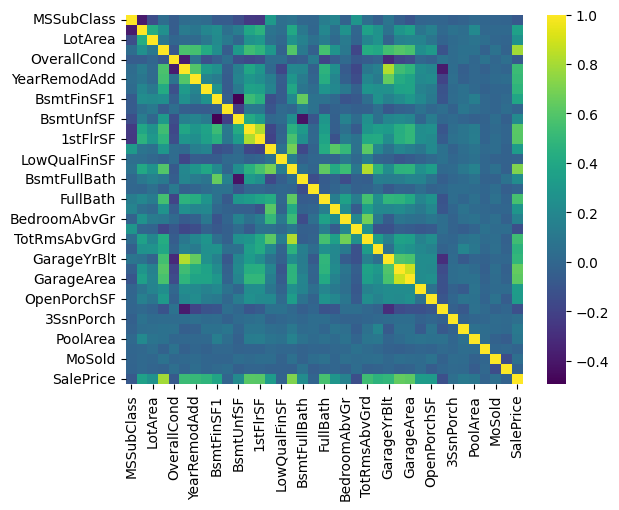

In [6]:
#correlation
train_corr = train_df[numeric_col].corr()
sns.heatmap(train_corr, cmap='viridis')